In [196]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [197]:
clean_file_path = "C:/Users/aniru/data-analysis/shark-tank-analysis/data/shark_tank_clean.csv"

In [198]:
tank_df = pd.read_csv(clean_file_path, parse_dates = True)

## InsightsBlockingIOError

#### What is the total number of episodes (aired) and entrepreneur that came in Total and in different seasons?

In [199]:
# General statistics

def total_entrepreneurs_season(season_number):
    return tank_df['presenter_count'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
total_entrepreneurs = tank_df['presenter_count'].sum()
total_episodes = tank_df.loc[
    tank_df['episode_number'] != 0
]

print(f'Total number of aired episodes: {total_episodes.shape[0]}')
print(f"Total number of entrepreneurs that appeared in Sharktank so far: {total_entrepreneurs}")
print(f'Entrepreneur in Season 1: {total_entrepreneurs_season(1)}')
print(f'Entrepreneur in Season 2: {total_entrepreneurs_season(2)}')
print(f'Entrepreneur in Season 3: {total_entrepreneurs_season(3)}')

Total number of aired episodes: 447
Total number of entrepreneurs that appeared in Sharktank so far: 966
Entrepreneur in Season 1: 314
Entrepreneur in Season 2: 353
Entrepreneur in Season 3: 299


In [200]:
# Total startups in each season

tank_df[['season_number', 'startup_name']].groupby('season_number').count()

,startup_name
season_number,
1,152
2,169
3,157


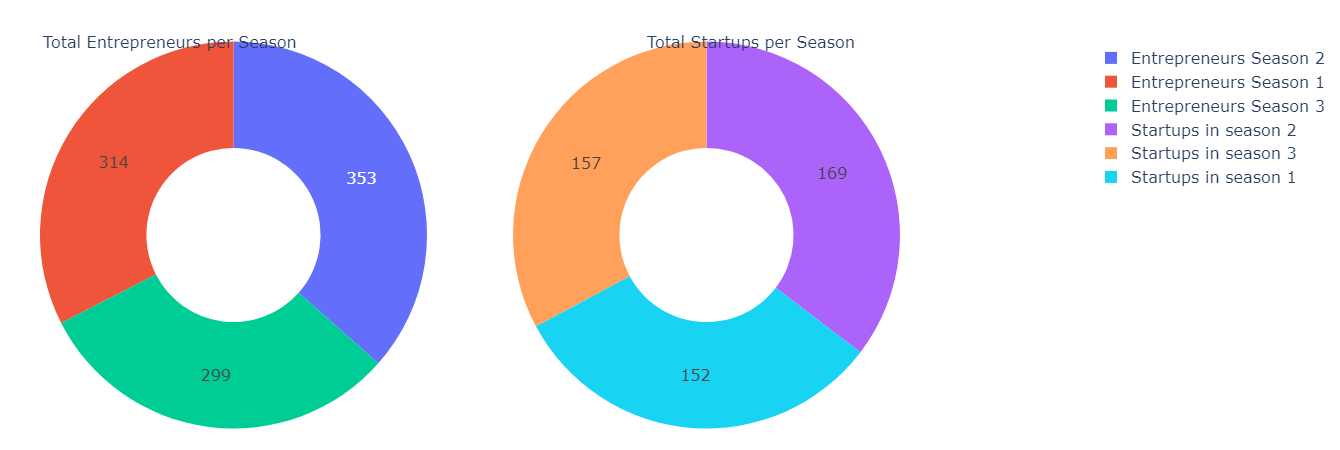

In [208]:
# Plot for number of startups and entreprenuers 

startups_season_one = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[0, 0]
startups_season_two = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[1, 0]
startups_season_three = tank_df[['season_number', 'startup_name']].groupby('season_number').count().values[2, 0]

labels_entre = ["Entrepreneurs Season 1", "Entrepreneurs Season 2", "Entrepreneurs Season 3"]
values_entre = [
    total_entrepreneurs_season(1),
    total_entrepreneurs_season(2),
    total_entrepreneurs_season(3)
]

labels_startup = ['Startups in season 1', 'Startups in season 2', 'Startups in season 3']
values_startup = [startups_season_one, startups_season_two, startups_season_three]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

fig.add_trace(
    go.Pie(labels=labels_entre, values=values_entre, hole=.45, textinfo='value'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=labels_startup, values=values_startup, hole=.45, textinfo='value'),
    row=1, col=2
)

fig.update_layout(
    font=dict(size=16),
    width=1000,
    height=450,
    margin=dict(l=40, r=40, t=30, b=10),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=True,
    legend=dict(orientation="v", yanchor="bottom", y=0.6, xanchor="right", x=1.5),
    annotations=[
        dict(
            text="Total Entrepreneurs per Season",
            x=0,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        ),
        dict(
            text="Total Startups per Season",
            x=0.95,
            y=1,
            xref="paper",
            yref="paper",
            showarrow=False
        )
    ]
)

fig.show()

#### Total Number of offers recieved and Total number of deals in all the seasons, and in different seasons seperately?

In [204]:
# Percentage of offers
def percentage_offers(season_number):
    total_offers_received = tank_df['received_offer'].loc[
        tank_df['season_number'] == season_number
    ].sum()
    
    total_startups = tank_df['startup_name'].loc[
        tank_df['season_number'] == season_number
    ].shape[0]

    return ((total_offers_received / total_startups) * 100).round(2)

In [205]:
# General Statistics

total_offers_received = tank_df['received_offer'].sum()
total_startups = tank_df['startup_name'].shape[0]

offers = ((total_offers_received / total_startups) * 100).round(2)

print(f"Total Number of offers received: {total_offers_received}")
print(f"Total Number of pitches: {total_startups}")

print(f"Percentage of Startups getting offer: {offers}%")
print()
print(f"Percentage of Startups getting offer in season 1: {percentage_offers(1)}%")
print(f"Percentage of Startups getting offer in season 2: {percentage_offers(2)}%")
print(f"Percentage of Startups getting offer in season 3: {percentage_offers(3)}%")

Total Number of offers received: 321
Total Number of pitches: 478
Percentage of Startups getting offer: 67.15%

Percentage of Startups getting offer in season 1: 63.16%
Percentage of Startups getting offer in season 2: 71.6%
Percentage of Startups getting offer in season 3: 66.24%


#### Categorize Startups by Industry and Plot Offers Received


In [239]:
# Total number of startups from different industries

startup_industry = tank_df[['industry', 'startup_name']].groupby('industry').count().rename(
    columns = {
        "startup_name": "Startups"
    }
)

startup_received_offer = tank_df[['industry', 'startup_name']].loc[
    tank_df['received_offer'] == 1
].groupby('industry').count().rename(columns = {
    "startup_name": "Got Offer"
})

startup_deal = tank_df[['industry', 'startup_name']].loc[
    tank_df['deal_amount'] != 0
].groupby('industry').count().rename(columns = {
    "startup_name": "Deals"
})

startup_offer = pd.merge(startup_industry, startup_received_offer, on="industry", how='left')
startup_deals = pd.merge(startup_offer, startup_deal, on="industry", how="left")

startup_deals['Got Offer (%)'] = ((startup_deals['Got Offer'] / startup_deals['Startups']) * 100).round(2)
startup_deals['Offers converted (%)'] = ((startup_deals['Deals'] / startup_deals['Got Offer']) * 100).round(2)

startup_deals

,Startups,Got Offer,Deals,Got Offer (%),Offers converted (%)
industry,,,,,
Agriculture,4,3,3,75.00,100.00
Automobile,17,10,8,58.82,80.00
Beverages,15,9,8,60.00,88.89
Education,11,8,7,72.73,87.50
Electronics,5,3,3,60.00,100.00
Entertainment,3,1,1,33.33,100.00
Fashion,95,66,54,69.47,81.82
Food,107,77,60,71.96,77.92
Hardware,2,1,1,50.00,100.00


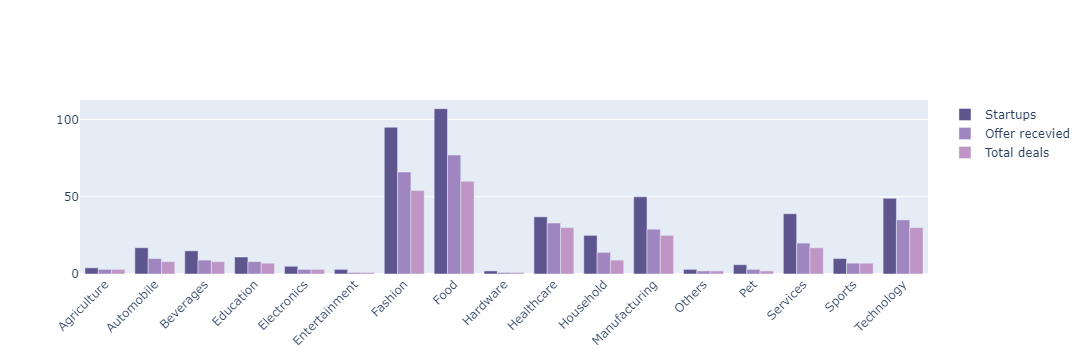

In [306]:


industry = startup_deals.index
startups = startup_deals.values[:, 0]
offers = startup_deals.values[:, 1]
deals = startup_deals.values[:, 2]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=industry,
    y=startups,
    name='Startups',
    marker_color='#5e548e'
))

fig.add_trace(go.Bar(
    x=industry,
    y=offers,
    name='Offer recevied',
    marker_color='#9f86c0'
))

fig.add_trace(go.Bar(
    x=industry,
    y=deals,
    name='Total deals',
    marker_color='#be95c4'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [247]:
# Top 5 Industries that got offer

startup_deals.sort_values('Got Offer', ascending=False).iloc[:5, :]

,Startups,Got Offer,Deals,Got Offer (%),Offers converted (%)
industry,,,,,
Food,107,77,60,71.96,77.92
Fashion,95,66,54,69.47,81.82
Technology,49,35,30,71.43,85.71
Healthcare,37,33,30,89.19,90.91
Manufacturing,50,29,25,58.00,86.21


In [248]:
startup_deals.keys()

Index(['Startups', 'Got Offer', 'Deals', 'Got Offer (%)',
       'Offers converted (%)'],
      dtype='object')

#### What is the average deal size for startups that appear on Shark Tank India, and how has this changed over time?

#### What is the average deal size for startups that appear on Shark Tank India, and how has this changed over time?